In [1]:
import pandas as pd

mall_customer_dataset = pd.read_csv("mall_customer_dataset.csv", index_col=0)
mall_customer_dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
mall_customer_dataset=pd.get_dummies(mall_customer_dataset,columns=["Gender"])
mall_customer_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,False,True
2,21,15,81,False,True
3,20,16,6,True,False
4,23,16,77,True,False
5,31,17,40,True,False


In [3]:
mall_customer_dataset = mall_customer_dataset.drop("Gender_Male", axis=1)
mall_customer_dataset.rename(columns={"Gender_Female": "Gender"}, inplace=True)
mall_customer_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,,,,
1,19,15,39,False
2,21,15,81,False
3,20,16,6,True
4,23,16,77,True
5,31,17,40,True


In [5]:
#pd.plotting.scatter_matrix(mall_customer_dataset,figsize=[10,10]);

In [6]:
income_spending = mall_customer_dataset[["Annual Income (k$)","Spending Score (1-100)"]]

c:\Users\Tomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


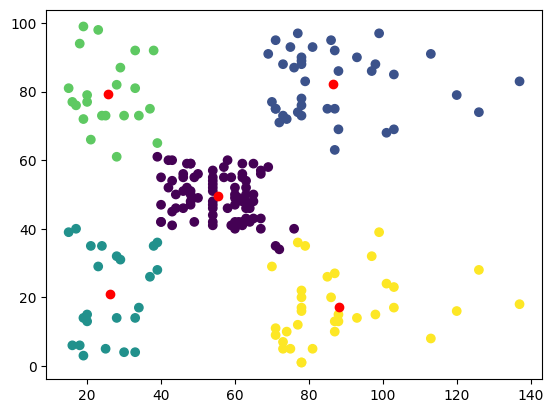

In [7]:
from sklearn.cluster import KMeans

K=5

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(income_spending)

import matplotlib.pyplot as plt

plt.scatter(income_spending["Annual Income (k$)"],income_spending["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

c:\Users\Tomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

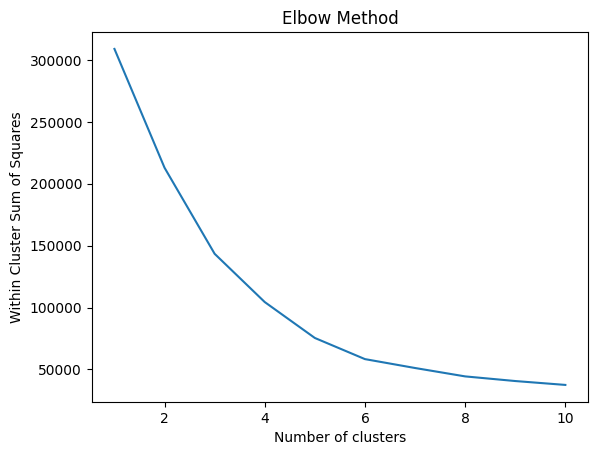

In [8]:
#Within cluster sum of squares
OMP_NUM_THREADS=1
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall_customer_dataset)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [9]:
K=5

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customer_dataset)

c:\Users\Tomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
mall_customer_dataset["Cluster"] = cluster
mall_customer_dataset.to_csv("mall_customer_dataset_clusters.csv")
mall_customer_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster
CustomerID,,,,,
1,19,15,39,False,4
2,21,15,81,False,3
3,20,16,6,True,4
4,23,16,77,True,3
5,31,17,40,True,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

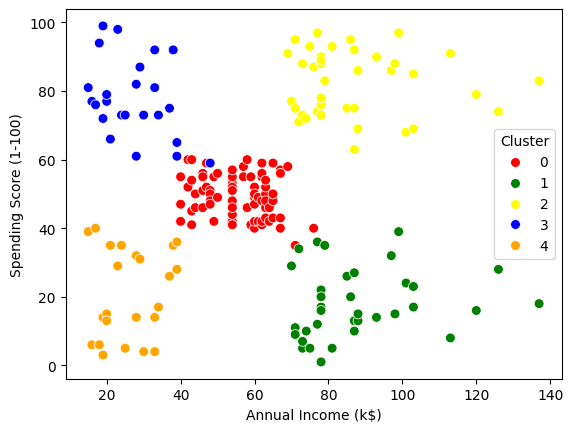

In [12]:
import seaborn as sns
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=mall_customer_dataset, hue="Cluster", s=50,
                palette=["red", "green", "yellow", "blue", "orange"])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

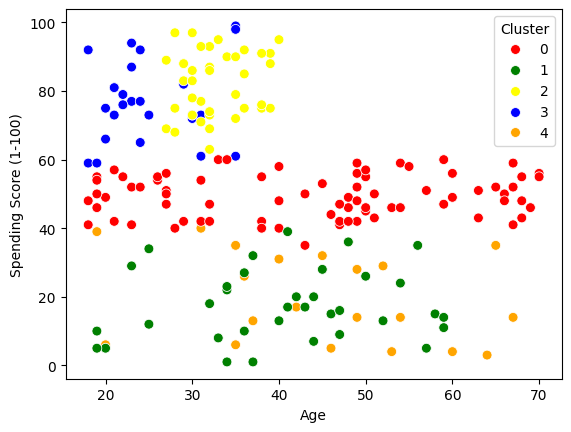

In [13]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=mall_customer_dataset, hue="Cluster", s=50,
                palette=["red", "green", "yellow", "blue", "orange"])

In [14]:
mall_customer_dataset.groupby(by="Cluster").mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender
Cluster,,,,
0,43.727273,55.480519,49.324675,0.597403
1,40.666667,87.750000,17.583333,0.472222
2,32.692308,86.538462,82.128205,0.538462
3,24.960000,28.040000,77.000000,0.560000
4,45.217391,26.304348,20.913043,0.608696


In [15]:
values = mall_customer_dataset.drop("Gender", axis=1)
values.groupby(by="Cluster").describe()

Age                                                       \
        count       mean        std   min   25%   50%    75%   max   
Cluster                                                              
0        77.0  43.727273  16.197495  18.0  28.0  47.0  55.00  70.0   
1        36.0  40.666667  11.496583  19.0  34.0  41.5  47.25  59.0   
2        39.0  32.692308   3.728650  27.0  30.0  32.0  35.50  40.0   
3        25.0  24.960000   5.412024  18.0  21.0  23.0  30.00  35.0   
4        23.0  45.217391  13.228607  19.0  35.5  46.0  53.50  67.0   

        Annual Income (k$)             ...                \
                     count       mean  ...    75%    max   
Cluster                                ...                 
0                     77.0  55.480519  ...  62.00   76.0   
1                     36.0  87.750000  ...  97.25  137.0   
2                     39.0  86.538462  ...  95.00  137.0   
3                     25.0  28.040000  ...  34.00   48.0   
4                     23.0  26.304348  ...  33.00   39.0   

        Spending Score (1-100)                                                \
                         count       mean        std   min   25%   50%   75%   
Cluster                                                                        
0                         77.0  49.324675   6.131115  35.0  44.0  49.0  55.0   
1                         36.0  17.583333  10.204691   1.0  10.0  16.0  24.5   
2                         39.0  82.128205   9.364489  63.0  74.5  83.0  90.0   
3                         25.0  77.000000  11.803954  59.0  72.0  76.0  82.0   
4                         23.0  20.913043  13.017167   3.0   9.5  17.0  33.5   

               
          max  
Cluster        
0        60.0  
1        39.0  
2        97.0  
3        99.0  
4        40.0  

[5 rows x 24 columns]

In [16]:
# # que el usuario me ingrese valores y yo le tenga que decir a que cluter pertenece